# Jessica replication attempts

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as LA
import statsmodels.api as sm
import geopandas as geo
import plotly.graph_objs as go #not installed I think
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import statsmodels.formula.api as smf
from scipy.optimize import lsq_linear

Read .dta files with PANDAS:

In [2]:
dtafile = './dataset/Pinotti-replication/dataset.dta'

'./dataset/Pinotti-replication/dataset.dta'

In [3]:
df = pd.read_stata(dtafile)
#df.head()

,reg,region,year,gdppercap,pop,gdp,vatot,vaag,vain,vams,...,robkidext,kwpop,ext,fire,kidnap,rob,smug,drug,theft,orgcrime
0,1.0,PIE,1951.0,4256.403320,3519000.0,14978.282987,NaN,NaN,NaN,NaN,...,NaN,1078.999756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,PIE,1952.0,4238.614746,3520000.0,14919.923358,NaN,NaN,NaN,NaN,...,NaN,1141.761353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,PIE,1953.0,4504.506348,3546000.0,15972.978975,NaN,NaN,NaN,NaN,...,NaN,1183.305176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,PIE,1954.0,4520.441895,3576000.0,16165.100942,NaN,NaN,NaN,NaN,...,NaN,1289.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,PIE,1955.0,4858.409180,3615000.0,17563.149767,NaN,NaN,NaN,NaN,...,NaN,1380.636230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df1 = df[df['year'] >= 1983] # relevant time interval

df2 = df1.groupby(['region', 'reg'])[['gdppercap', 'mafia', 'murd', 'ext', 'fire', 'kidnap', 'rob', 'smug',
            'drug', 'theft', 'orgcrime']].mean()
print(df2)
df2 = df2.reset_index()

                gdppercap     mafia      murd        ext       fire    kidnap  \
region reg                                                                      
ABR    13.0  10813.008789  0.069603  0.642339   5.656508   9.271603  1.664352   
BAS    17.0   8241.510742  0.354640  1.272044   7.721858  13.595174  1.400653   
CAL    18.0   7344.603516  1.810759  6.138698  10.525242  53.037782  1.961051   
CAM    15.0   8275.800781  0.944485  3.545512   9.773273  10.123985  2.418288   
EMR    8.0   15761.854492  0.068224  0.858834   3.793923  11.610007  1.803035   
FVG    6.0   14599.148438  0.073351  0.592994   3.516320  13.267376  1.306268   
HIS    22.0   8102.531738  1.143903  4.156266   9.807629  28.221387  2.135756   
LAZ    12.0  13765.404297  0.155065  1.095161   4.841046   9.289264  2.033656   
LIG    7.0   14325.208984  0.128759  1.087301   4.354321  16.025006  1.888542   
LOM    3.0   15662.940430  0.074436  0.989695   3.609772   8.024903  1.388658   
MAR    11.0  12971.120117  0

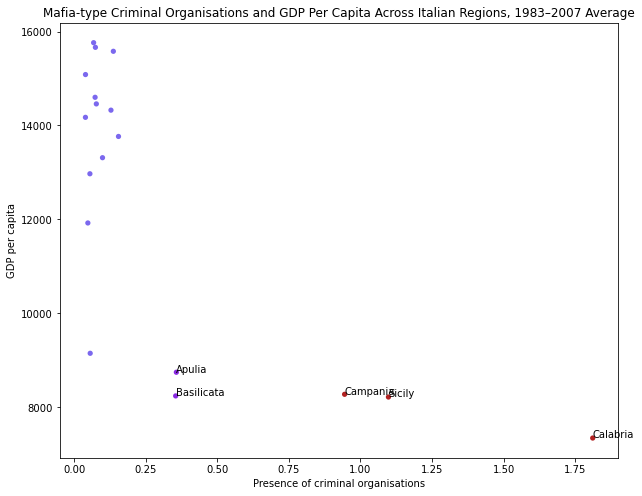

In [36]:
# replicating Figure 2.1
color = np.where((df2['reg']==15) | (df2['reg']==18) | (df2['reg']==19), 'firebrick',                # EXCLUDED
                 np.where((df2['reg']==16) | (df2['reg']==17), 'blueviolet',                         # TREATED
                          np.where((df2['reg']<=12) | (df2['reg']==20), 'mediumslateblue', 'none'))) # THE REST

df2.plot.scatter('mafia', 'gdppercap', c=color, s=5, linewidth=3, )
#plt.figure(figsize=(10,8), dpi=300)

plt.annotate('Sicily', (1.097555, 8217.568359))
plt.annotate('Calabria',(1.810759, 7344.603516))
plt.annotate('Campania',(0.944485, 8275.800781))

plt.annotate('Basilicata',(0.354640, 8241.510742))
plt.annotate('Apulia',(0.357075, 8745.296875))

plt.ylabel('GDP per capita')
plt.xlabel('Presence of criminal organisations')
plt.title('Mafia-type Criminal Organisations and GDP Per Capita Across Italian Regions, 1983–2007 Average')

plt.show()

<AxesSubplot:title={'center':'Mafia-type Criminal Organisations and GDP Per Capita Across Italian Regions, 1983–2007 Average'}, xlabel='Presence of magia organisations', ylabel='GDP per capita'>

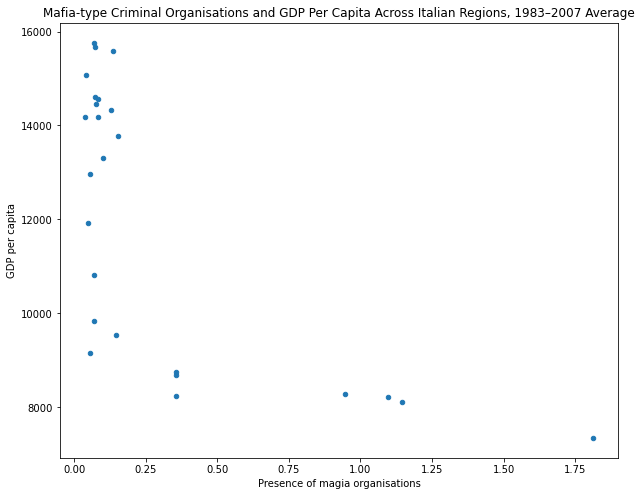

In [47]:
# using pandas
df1.groupby('region')[['gdppercap', 'mafia', 'murd', 'ext', 
                       'fire', 'kidnap', 'rob', 'smug',
                       'drug', 'theft', 'orgcrime']].mean().plot.scatter(x='mafia',
                                                                         y='gdppercap', 
                                                                         xlabel='Presence of magia organisations',
                                                                        ylabel='GDP per capita',
                                                                        cmap='jet',
                                                                        title='Mafia-type Criminal Organisations and GDP Per Capita Across Italian Regions, 1983–2007 Average')

In [ ]:
# 21 NEW : APULIA AND BASILICATA
# 22 HIS : SICILY, CAMPANIA AND CALABRIA
# 23 STH : ABRUZZO, MOLISE AND SARDINIA
# 24 NTH : Piedmont, Aosta Valley, Lombardy, Trentino Alto Adige, Veneto,
# Friuli Venezia Giulia, Liguria, Emilia Romagna, Tuscany, Umbria, Marche, Lazio
# 25 OTH : STH+NTH

In [104]:
# filter to keep only the grouped data in the dataframe: NEW, HIS, STH, NTH
grouped = (df['reg'] > 20) & (df['reg'] <25)

In [111]:
# apply the filter to the dataframe and store it as df3
df3 = df.loc[grouped, ['region','reg','year','murd']]
# only keep relevant years
df3 = df3[df3['year'] >= 1956]
df3.head()

,region,reg,year,murd
1145,NEW,21.0,1956.0,2.256770
1146,NEW,21.0,1957.0,1.697030
1147,NEW,21.0,1958.0,1.594022
1148,NEW,21.0,1959.0,1.686508
1149,NEW,21.0,1960.0,1.617606


In [115]:
df3 = df[df['reg'] > 20] # selecting specific regions (HIS, NEW, NTH, OTH, STH)
df3 = df3[df3['year'] >= 1956]

df3 = df3[['murd', 'year', 'region']]
df3 = df3.pivot(index='year', columns='region', values='murd')
plt.rcParams["figure.figsize"] = (10,5)
df3.plot()

,murd,year,region
1145,2.256770,1956.0,NEW
1146,1.697030,1957.0,NEW
1147,1.594022,1958.0,NEW
1148,1.686508,1959.0,NEW
1149,1.617606,1960.0,NEW
...,...,...,...
1420,0.897295,2003.0,NTH
1421,0.806045,2004.0,NTH
1422,0.671200,2005.0,NTH
1423,0.758293,2006.0,NTH
